Lab | Logisitc Regression, Handling Imbalanced Data
For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Import the required libraries and modules that you would need.
Read that data into Python and call the dataframe churnData.

Round 1

Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
Check for null values in the dataframe. Replace the null values.
Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Scale the features either by using normalizer or a standard scaler.
Split the data into a training set and a test set.
Fit a logistic Regression model on the training data.

Round 2

Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data.

Round 3

apply K-fold cross validation on your Decision Tree Classifier and check the model score.
fit a Random forest Classifier on the data and compare the accuracy. Note: So far we have not balanced the data.
Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [2]:
data = pd.read_csv('../lab_data/DATA_Customer-Churn.csv')

In [3]:
filter = data['TotalCharges'] == ' '
filter.value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of False    7032
True       11
Name: TotalCharges, dtype: int64>

In [4]:

data = data[data['TotalCharges'] != ' ']
data['TotalCharges'] = data['TotalCharges'].astype('float')


In [5]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
# check for nans
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
y = data['Churn']
y = pd.get_dummies(y, drop_first=True)
#y = data['TotalCharges']

x_data = data.drop(columns='Churn')

In [8]:
x_num = x_data[['tenure', 'MonthlyCharges', 'TotalCharges']]
x_data.drop(columns=['tenure','MonthlyCharges', 'TotalCharges'], inplace=True)

In [9]:
x_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
print(x_data)
cat_list = x_data.columns

      gender  SeniorCitizen Partner Dependents PhoneService OnlineSecurity  \
0     Female              0     Yes         No           No             No   
1       Male              0      No         No          Yes            Yes   
2       Male              0      No         No          Yes            Yes   
3       Male              0      No         No           No            Yes   
4     Female              0      No         No          Yes             No   
...      ...            ...     ...        ...          ...            ...   
7038    Male              0     Yes        Yes          Yes            Yes   
7039  Female              0     Yes        Yes          Yes             No   
7040  Female              0     Yes        Yes           No            Yes   
7041    Male              1     Yes         No          Yes             No   
7042    Male              0      No         No          Yes            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV Stre

In [11]:
cat_list

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract'],
      dtype='object')

In [12]:
# first run
# tenure, SeniorCitizen, MonthlyCharges and TotalCharges

x_data_cat = pd.get_dummies(x_data, drop_first=True)




In [13]:
x_data_cat

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

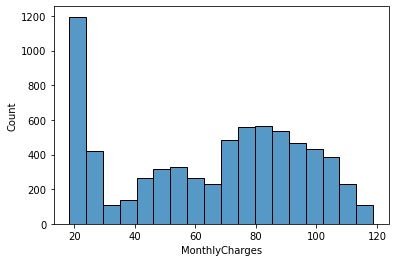

In [14]:
sns.histplot(x_num['MonthlyCharges'])

<AxesSubplot:xlabel='tenure', ylabel='Count'>

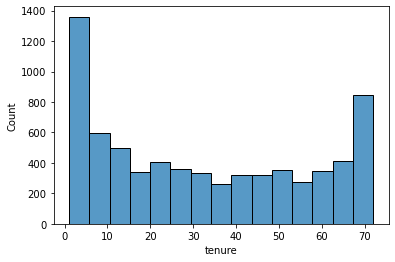

In [15]:
sns.histplot(x_num['tenure'])

In [16]:
pwr = PowerTransformer('box-cox')
#pwr = StandardScaler()

In [17]:
pwr.fit(x_num['tenure'].values.reshape(-1,1))
#x_num['tenure'] = pwr.transform(x_num['tenure'].values.reshape(-1,1))

PowerTransformer(method='box-cox')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

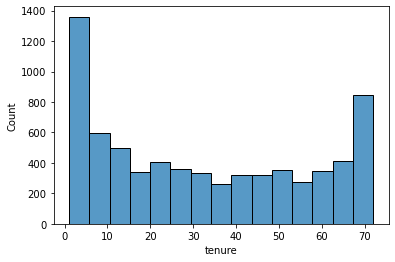

In [18]:
sns.histplot(x_num['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

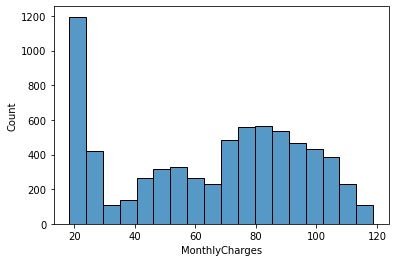

In [19]:
sns.histplot(data['MonthlyCharges'])

In [20]:
pwr.fit(data['MonthlyCharges'].values.reshape(-1,1))
#data['MonthlyCharges'] =  pwr.transform(data['MonthlyCharges'].values.reshape(-1,1))

PowerTransformer(method='box-cox')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

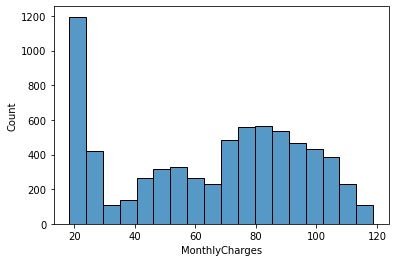

In [21]:
sns.histplot(data['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

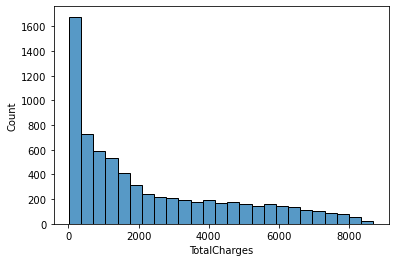

In [22]:
sns.histplot(data['TotalCharges'])

In [23]:
#stand = StandardScaler().fit(data['TotalCharges'].values.reshape(-1,1))
#stand = PowerTransformer('box-cox').fit(data['MonthlyCharges'].values.reshape(-1,1))
#data['TotalCharges'] = stand.transform(data['TotalCharges'].values.reshape(-1,1))

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

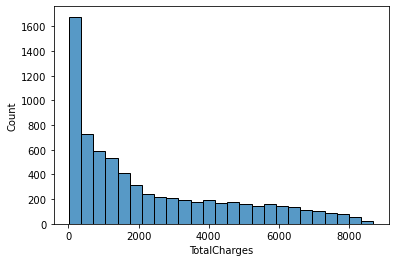

In [24]:
sns.histplot(data['TotalCharges'])

In [25]:
#x_complete = pd.concat([x_data_cat, x_num], axis=1)#, ignore_index=True,)

In [26]:
x_complete = pd.concat([x_num, x_data_cat['SeniorCitizen']], axis=1)

In [27]:
x_complete['SeniorCitizen'] = x_complete['SeniorCitizen'].astype('str')

In [28]:
log = LogisticRegression() 

X_train, X_test, y_train, y_test = train_test_split(x_complete, y, test_size=0.20, random_state=42)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)


In [29]:
print(X_train.dtypes)
print(y_train.dtypes)

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
SeniorCitizen      object
dtype: object
Yes    uint8
dtype: object


In [30]:


log.fit(X_train_mod, y_train)

#log.fit(X_train, y_train)


/opt/anaconda3/envs/DA_Enviroment/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [31]:

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

#y_pred_train_log = log.predict(X_train)
#y_pred_test_log = log.predict(X_test)



,Error_metric,Train,Test
0,Accuracy,0.795378,0.781805
1,Precision,0.667641,0.630350
2,Recall,0.458194,0.433155


Confusion matrix for the train set
[[3789  341]
 [ 810  685]]


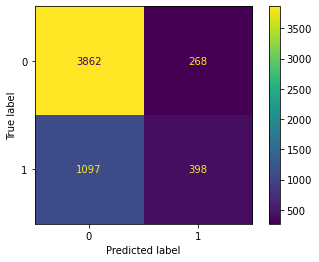



Confusion matrix for the test set
[[938  95]
 [212 162]]


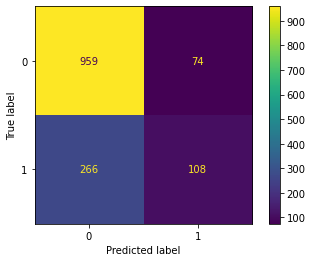

In [32]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log, )]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train,y_train, values_format = 'd')
#plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test,y_test, values_format = 'd')
#plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()


Error_metric	Train	Test
0	Accuracy	0.795378	0.781805
1	Precision	0.667641	0.630350
2	Recall	0.458194	0.433155


In [33]:
X_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_complete, y, test_size=0.20, random_state=42)

In [71]:
model_tree = DecisionTreeClassifier(max_depth=6)

In [72]:
model_tree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=6)

In [73]:
y_pred_test_tree = model_tree.predict(x_test_tree)
y_pred_train_tree = model_tree.predict(X_train_tree)

,Error_metric,Train,Test
0,Accuracy,0.806578,0.771144
1,Precision,0.692162,0.597744
2,Recall,0.490301,0.425134


Confusion matrix for the train set
[[3804  326]
 [ 762  733]]


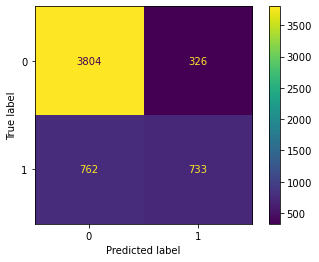



Confusion matrix for the test set
[[938  95]
 [212 162]]


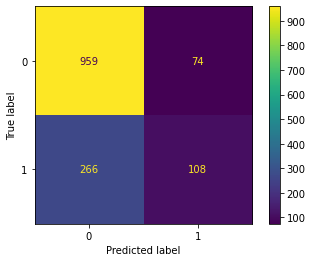

In [74]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_tree, y_pred_train_tree),
                                         precision_score(y_train_tree, y_pred_train_tree),
                                         recall_score(y_train_tree, y_pred_train_tree)],
                               'Test': [accuracy_score(y_test_tree, y_pred_test_tree),
                                        precision_score(y_test_tree, y_pred_test_tree),
                                        recall_score(y_test_tree, y_pred_test_tree, )]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train_tree,y_pred_train_tree))
plot_confusion_matrix(model_tree,X_train_tree, y_train_tree, values_format = 'd')
#plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test,y_test, values_format = 'd')
#plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

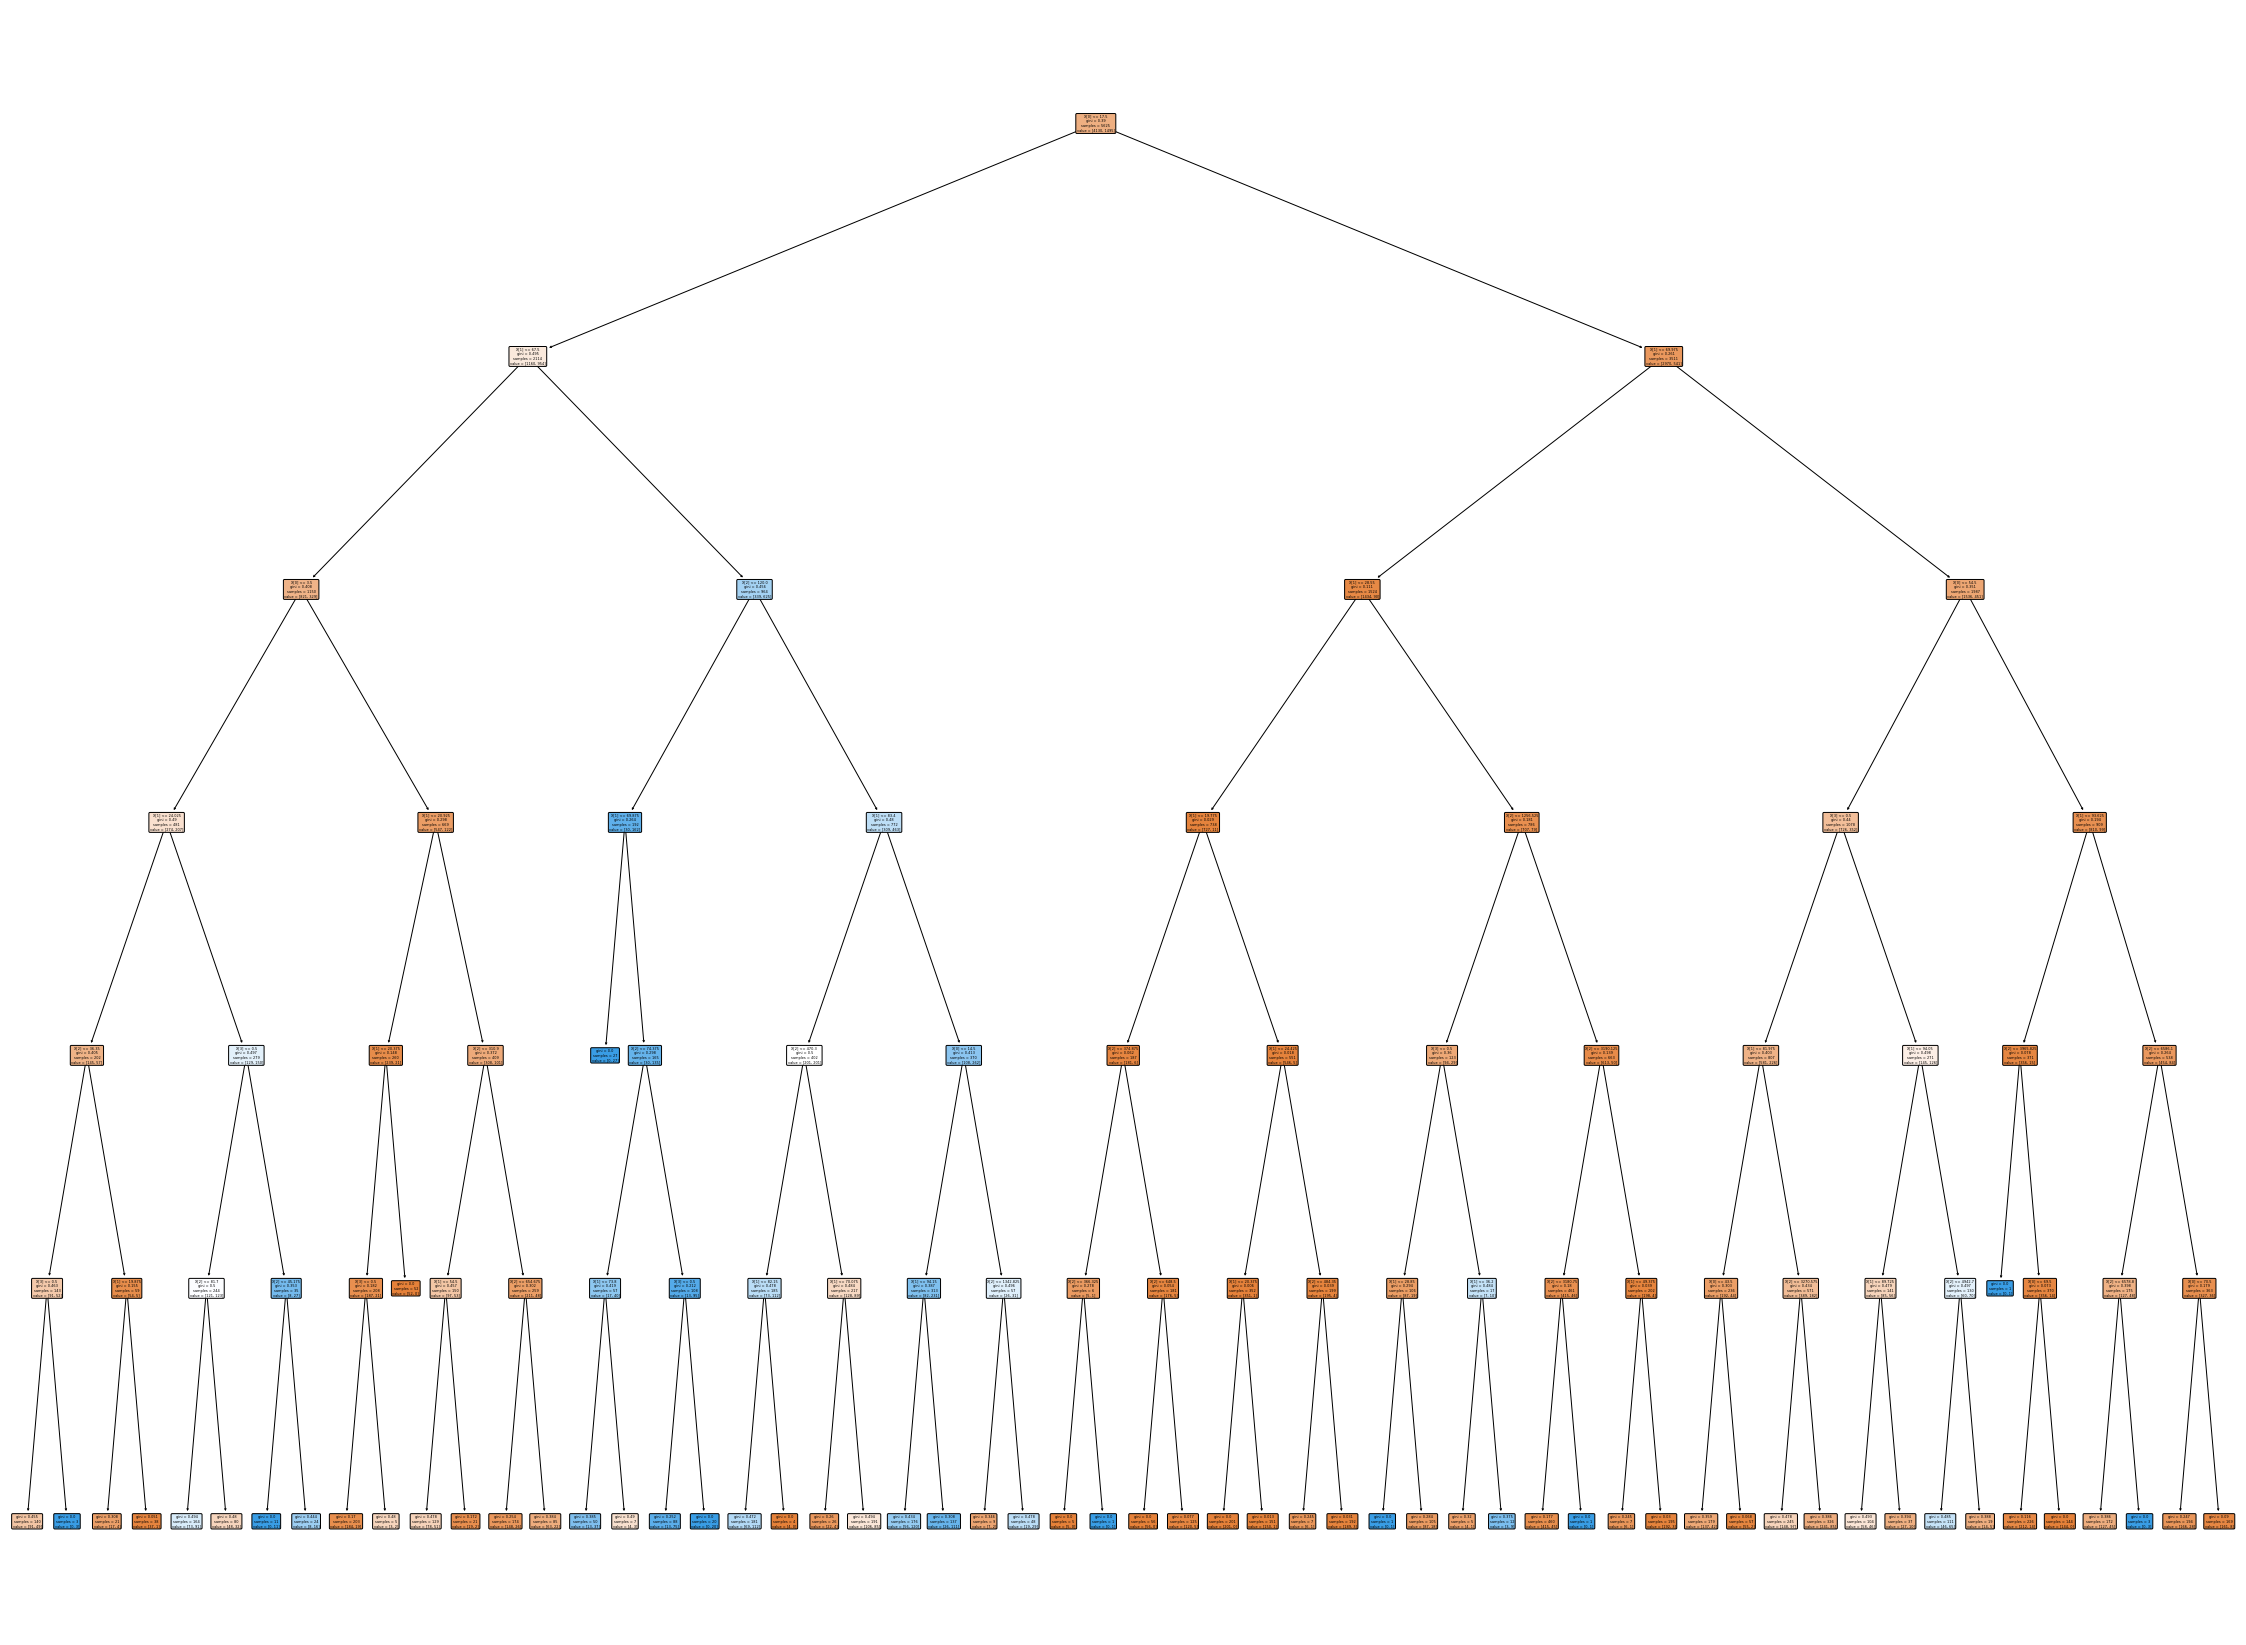

In [75]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,30))

plot_tree(model_tree,filled = True, rounded=True)
plt.show()  